# Dividir o dataset

Subir no git pequenos chunks

In [4]:
#source "C:/Users/leand/venvs/pns/Scripts/activate"
# python -m ipykernel install --user --name=pns --display-name "pns"

import os
import pandas as pd

In [9]:


def split_csv_by_rows(file_path, output_dir, rows_per_file=1000):
    """
    Divide um arquivo CSV em múltiplos arquivos menores com um número fixo de linhas.

    :param file_path: Caminho do arquivo CSV original.
    :param output_dir: Diretório onde os arquivos menores serão salvos.
    :param rows_per_file: Número de linhas por arquivo menor.
    """

    # Criar o diretório de saída, se não existir
    os.makedirs(output_dir, exist_ok=True)

    # Inicializar o contador de arquivos
    file_index = 0

    # Abrir o arquivo CSV em pedaços
    for chunk in pd.read_csv(file_path, chunksize=rows_per_file):
        output_file = os.path.join(output_dir, f"pns2019_{file_index}.csv")
        chunk.to_csv(output_file, index=False)
        print(f"Arquivo salvo: {output_file}")
        file_index += 1

    print(f"Processo concluído. Total de arquivos criados: {file_index}")

# Exemplo de uso
file_path = "../PNS_2019_CSV/pns2019.csv"  # Caminho para o arquivo grande
output_dir = "data/"  # Diretório para salvar os arquivos menores

split_csv_by_rows(file_path, output_dir, rows_per_file=14000)


Arquivo salvo: data/pns2019_0.csv
Arquivo salvo: data/pns2019_1.csv
Arquivo salvo: data/pns2019_2.csv
Arquivo salvo: data/pns2019_3.csv
Arquivo salvo: data/pns2019_4.csv
Arquivo salvo: data/pns2019_5.csv
Arquivo salvo: data/pns2019_6.csv
Arquivo salvo: data/pns2019_7.csv
Arquivo salvo: data/pns2019_8.csv
Arquivo salvo: data/pns2019_9.csv
Arquivo salvo: data/pns2019_10.csv
Arquivo salvo: data/pns2019_11.csv
Arquivo salvo: data/pns2019_12.csv
Arquivo salvo: data/pns2019_13.csv
Arquivo salvo: data/pns2019_14.csv
Arquivo salvo: data/pns2019_15.csv
Arquivo salvo: data/pns2019_16.csv
Arquivo salvo: data/pns2019_17.csv
Arquivo salvo: data/pns2019_18.csv
Arquivo salvo: data/pns2019_19.csv
Arquivo salvo: data/pns2019_20.csv
Processo concluído. Total de arquivos criados: 21


# Colunas principais - Não cabe na memória o dataset completo

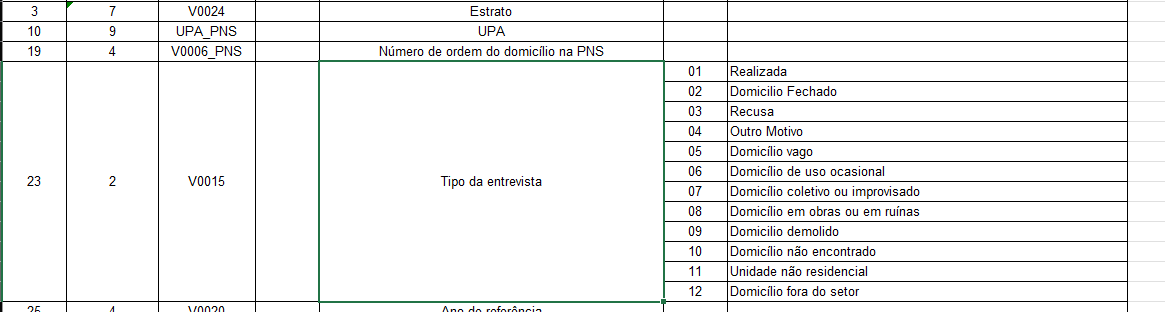

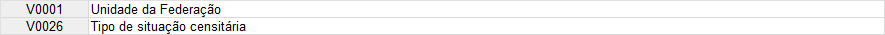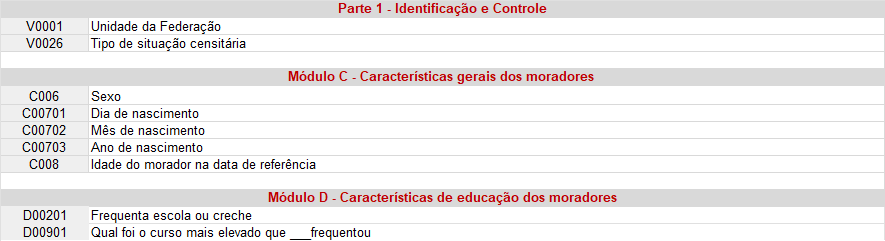

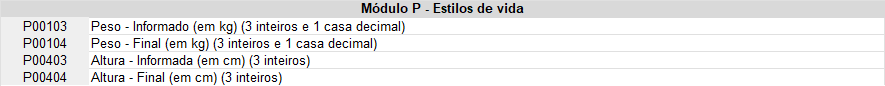

## Colunas mapeadas

In [ ]:
colunas_interesse = [
    "V0001",  # Unidade da Federação
    "V0026",  # Tipo de situação censitária
    "C006",  # Sexo
    "C00701",  # Dia de nascimento
    "C00702",  # Mês de nascimento
    "C00703",  # Ano de nascimento
    "C008",  # Idade do morador na data de referência
    "D00201",  # Frequenta escola ou creche
    "D00901",  # Qual foi o curso mais elevado que ___frequentou
    "G046",  # ___ tem dificuldade permanente de enxergar mesmo usando óculos, lentes de contato ou lupas?
    "G049",  # ____________ faz uso de aparelho auditivo
    "G051",  # ____________ faz uso de implante coclear?
    "G053",  # ____________ faz uso de sistema de frequência modulada individual (sistema FM)?
    "G059",  # ___ usa algum aparelho de auxílio para se locomover?
    "G060",  # ____________ faz uso de cadeira de rodas?
    "G062",  # ____________ faz uso de bengala, muletas ou andador?
    "G064",  # ____________ faz uso de prótese?
    "G066",  # ____________ faz uso de órtese?
    "G070",  # ___ tem dificuldade permanente de caminhar ou subir degraus, mesmo usando prótese, bengala ou outro aparelho de auxílio? (Para moradores com 5 anos ou mais de idade.) OU Comparado com crianças da mesma idade, ___ tem dificuldade permanente para caminhar, mesmo usando prótese, bengala ou aparelho de auxílio? (Para moradores com 2 a 4 anos de idade.)
    "G072",  # ___ usa algum aparelho de auxílio para realizar movimentos com os membros superiores?
    "G073",  # ____________ faz uso de prótese para os membros superiores?
    "G079",  #  ___tem dificuldade permanente para levantar uma garrafa com dois litros de água da cintura até a altura dos olhos, mesmo usando prótese ou aparelho de auxílio? (Somente para moradores com 5 anos ou mais de idade.)
    "G083",  # Por causa de alguma limitação nas funções mentais ou intelectuais, _________ tem dificuldade permanente para realizar atividades habituais, como se comunicar, realizar cuidados pessoais, trabalhar, ir à escola, brincar, etc.? (Para moradores com 5 anos ou mais de idade.) OU Por causa de alguma limitação nas funções mentais ou intelectuais, _________ tem dificuldade permanente para realizar atividades habituais, como frequentar a escola, brincar e etc.? (Para moradores com 2 a 4 anos de idade.)
    "G084",  # Nos últimos doze meses ___ recebe ou recebeu, algum cuidado em reabilitação de forma regular? (Por reabilitação quero dizer fisioterapia, terapia ocupacional, fonoaudiologia psicoterapia etc.)
    "L021",  # Foi realizado o teste do pezinho?
    "L033",  # O teste do coraçãozinho realizado deu resultado alterado?
    "L037",  # Vacina Penta (também chamada de Pentavalente, DTP/Hib/HB)
    "L038",  # Vacina Poliomielite (também chamada de gotinha, VIP, VOP, PÓLIO, ANTIPÓLIO, POLIOMIELITE, SABIN)
    "L039",  # Vacina Pneumocócica (também chamada de Pneumo 10, Pneumo 13, Pncc)
    "L040",  # Vacina Tríplice Viral (também chamada SCR, TRIVIRAL, TV, MMR).
    "L01701",  # Leite materno?
    "L018",  # Desde que ___________nasceu, tomou ou comeu outro alimento que não leite materno?
    "L019",  # Alguma vez ___________ recebeu Sulfato Ferroso?
    "P00103",  # Peso - Informado (em kg) (3 inteiros e 1 casa decimal)
    "P00104",  # Peso - Final (em kg) (3 inteiros e 1 casa decimal)
    "P00403",  # Altura - Informada (em cm) (3 inteiros)
    "P00404",  # Altura - Final (em cm) (3 inteiros)
    "Q00201",  # Algum médico já lhe deu o diagnóstico de hipertensão arterial (pressão alta)?
    "Q00202",  # Essa hipertensão arterial (pressão alta) ocorreu apenas durante algum período de gravidez?
    "Q003",  # Que idade o(a) Sr(a) tinha no primeiro diagnóstico de hipertensão arterial (pressão alta)?
    "Q028",  # Em geral, em que grau a hipertensão ou alguma complicação da hipertensão limita as suas atividades habituais (como trabalhar, estudar, realizar afazeres domésticos etc.)?
    "Q03001",  # Algum médico já lhe deu o diagnóstico de diabetes?
    "Q03002",  # Esse diabetes ocorreu apenas durante algum período de gravidez?
    "Q031",  # Que idade o(a) Sr(a) tinha no primeiro diagnóstico do diabetes?
    "Q055011",  # Problemas na vista
    "Q055012",  # Infarto ou AVC (Acidente Vascular cerebral) /derrame ou outro problema circulatório
    "Q055013",  # Problema nos rins
    "Q060",  # Algum médico já lhe deu o diagnóstico de colesterol alto?
    "Q061",  # Que idade o(a) Sr(a) tinha no primeiro diagnóstico de colesterol alto?
    "Q06307",  # Infarto
    "Q06308",  # Angina
    "Q06309",  # Insuficiência cardíaca
    "Q06310",  # Arritmia
    "Q064",  # Que idade o(a) Sr(a) tinha no primeiro diagnóstico da doença do coração?
    "Q068",  # Algum médico já lhe deu o diagnóstico de AVC (Acidente Vascular Cerebral) ou derrame?
    "Q070",  # Que idade o(a) Sr(a) tinha no primeiro diagnóstico do derrame (ou AVC)?
    "Q074",  # Algum médico já lhe deu o diagnóstico de asma (ou bronquite asmática)?
    "Q075",  # Que idade o(a) Sr(a) tinha no primeiro diagnóstico de asma?
    "Q079",  # Algum médico já lhe deu o diagnóstico de artrite ou reumatismo?
    "Q080",  # Que idade o(a) Sr(a) tinha no primeiro diagnóstico de artrite ou reumatismo?
    "Q084",  # O(a) Sr(a) tem algum problema crônico de coluna, como dor crônica nas costas ou no pescoço, lombalgia, dor ciática, problemas nas vértebras ou disco?
    "Q085",  # Que idade o(a) Sr(a) tinha quando começou o problema na coluna?
    "Q087",  # Em geral, em que grau o problema na coluna limita as suas atividades habituais (tais como trabalhar, realizar afazeres domésticos, etc.)?
    "Q088",  # Algum médico já lhe deu o diagnóstico de DORT?
    "Q08901",  # Que idade o(a) Sr(a) tinha no primeiro diagnóstico de DORT?
    "Q091",  # Em geral, em que grau o DORT limita as suas atividades habituais (tais como trabalhar, realizar afazeres domésticos etc.)?
    "Q092",  # Algum médico ou profissional de saúde mental (como psiquiatra ou psicólogo) já lhe deu o diagnóstico de depressão?
    "Q09301",  # Que idade o(a) Sr(a) tinha no primeiro diagnóstico de depressão?
    "Q109",  # Em geral, em que grau a depressão limita as suas atividades habituais (tais como trabalhar, realizar afazeres domésticos, etc.)?
    "Q11007",  # Diagnóstico de Esquizofrenia
    "Q11008",  # Diagnóstico de Transtorno bipolar
    "Q11009",  # Diagnóstico de TOC (Transtorno obsessivo compulsivo)
    "Q111",  # Que idade o(a) Sr(a) tinha no primeiro diagnóstico de doença mental?
    "Q11604",  # Algum médico já lhe deu o diagnóstico de alguma outra doença crônica no pulmão, tais como enfisema pulmonar, bronquite crônica ou DPOC (Doença Pulmonar Obstrutiva Crônica)?
    "Q11605",  # Diagnóstico de enfisema pulmonar
    "Q11606",  # Diagnóstico de bronquite crônica
    "Q11701",  # Que idade o(a) Sr(a) tinha no primeiro diagnóstico dessa(s) doença(s) no pulmão?
    "Q120",  # Algum médico já lhe deu diagnóstico de câncer?
    "Q12201",  # Que idade o(a) Sr(a) tinha no primeiro diagnóstico de doença mental?
    "Q124",  # Algum médico já lhe deu o diagnóstico de insuficiência renal crônica?
    "Q125",  # Que idade o(a) Sr(a) tinha no primeiro diagnóstico de insuficiência renal crônica?
    "R025",  # Com que idade a sra ficou menstruada pela primeira vez?
    "R026",  # A sra ainda fica menstruada?
    "R027",  # Com que idade a sra parou de menstruar?
    "R028",  # A sra já entrou na menopausa?
    "R029",  # Alguma vez a sra fez ou faz tratamento hormonal para alívio dos sintomas da menopausa (com comprimidos, adesivos, gel ou injeções)?
    "R034",  # A sra usa algum método para evitar a gravidez atualmente?
    "R035",  # Qual o principal motivo de não evitar a gravidez?
    "R03601",  # Pilula?
    "R037",  # A sra e/ou seu companheiro já fizeram ou fazem algum tratamento para engravidar?
    "R038",  # Há quanto tempo a sra está tentando engravidar?
    "S065",  # Alguma vez ficou grávida, mesmo que a gravidez não tenha chegado até o final?
    "S066",  # Quantos partos a Sra já teve?
    "S06701",  # Em que data foi o último parto?
    "S068",  # Quando estava grávida fez alguma consulta de pré-natal?
    "S06901",  # Quantas tempo de gravidez tinha quando fez a primeira consulta pré-natal?
    "S06902",  # Quantas tempo de gravidez tinha quando fez a primeira consulta pré-natal?
    "S070",  # Quantas consultas de pré-natal fez durante esta gravidez?
    "S082",  # Qual foi o resultado do teste/exame para sífilis?
    "S083",  # Recebeu tratamento para sífilis?
    "S086",  # Qual foi o resultado do teste/exame para sífilis do seu parceiro?
    "S087",  # O seu parceiro foi tratado?
    "S095",  # Durante o pré-natal a Sra foi orientada a usar preservativo?
    "S096",  # Quanto tempo antes do parto a Sra foi à última consulta do pré-natal?
    "S098",  # Quando estava grávida tomou alguma injeção para prevenir o bebê contra difteria e tétano (mal dos sete dias) – dT ou dTpa?
    "S099",  # Quantas doses dessa injeção tomou durante esta gravidez?
    "S09901",  # Número de doses
    "S110",  # Qual foi o peso dele(a) ao nascer?
    "S11001",  # Peso ao nascer (em quilogramas)
    "S112",  # Onde foi realizado o parto?
    "S115",  # Qual foi o tipo de parto?
    "S116",  # Nesta gravidez, entrou em trabalho de parto?
    "S117",  # Qual o principal motivo de ter tido parto cesáreo?
    "S118",  # Quantas semanas de gravidez tinha no momento do parto?
    "S11801",  # Quantidade de semanas
    "S125",  # Teve alguma complicação durante o parto?
    "S126",  # Você teve alguma complicação após o parto?
    "S127",  # Por causa dessa complicação precisou ser internada?
    "S130",  # Durante a primeira hora após o nascimento, seu(sua) filho(a) foi colocado(a) em contato com você pele a pele?
    "S131",  # Depois do nascimento, ele(a) ficou com você no quarto até a alta hospitalar?
    "S132",  # Seu(sua) filho(a) saiu do hospital junto com você?
    "S133",  # A criança não saiu do hospital junto com você porque:
    "S134",  # Você fez consulta de puerpério (consulta com médico ou enfermeiro até 42 dias após o parto)?
    "S136",  # Durante os primeiros três meses após o parto, você tomou medicamento contendo somente ferro ou ferro com vitaminas?
    "W001",  # Antropometria aferida do morador selecionado
    "W00101",  # Peso - 1ª pesagem (em kg)(3 inteiros e 1 casa decimal)
    "W00102",  # Peso - 2ª pesagem (em kg)(3 inteiros e 1 casa decimal)
    "W00103",  # Peso - Final (em kg)(3 inteiros e 1 casa decimal)
    "W00201",  # Altura - 1ª medição (em cm)(3 inteiros e 1 casa decimal)
    "W00202",  # Altura - 2ª medição (em cm)(3 inteiros e 1 casa decimal)
    "W00203",  # Altura - Final (em cm)(3 inteiros e 1 casa decimal)
    "VDL001",  # Idade em meses das crianças nascidas no período de referência do Módulo L
]

# Analise de Dados

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Lista das colunas de interesse (ajustar conforme os nomes reais do CSV)
colunas_interesse = [
    "V0001",  # Unidade da Federação
    "V0024", # Estrato
    "UPA_PNS", # UPA
    "V0006_PNS", # Número ordem domicilio PNS
    "C00301", # Número ordem do morador
    "C001", # Quantidade de pessoas no domicilio
    "V0015", # Tipo da Entrevista
    "V0022", # Quantidade de moradores
    "V0026",  # Tipo de situação censitária
    "V0031", # Tipo de área Capital, Metropolitana
    "C006",   # Sexo
    "C00701",  # Dia de nascimento
    "C00702",  # Mês de nascimento
    "C00703",  # Ano de nascimento
    "C008",   # Idade
    "P00103", # Peso informado
    "P00104", # Peso final
    "P00403", # Altura informada
    "P00404",  # Altura final
    "W001",  # Antropometria aferida do morador selecionado
    "W00101",  # Peso - 1ª pesagem (em kg)(3 inteiros e 1 casa decimal)
    "W00102",  # Peso - 2ª pesagem (em kg)(3 inteiros e 1 casa decimal)
    "W00103",  # Peso - Final (em kg)(3 inteiros e 1 casa decimal)
    "W00201",  # Altura - 1ª medição (em cm)(3 inteiros e 1 casa decimal)
    "W00202",  # Altura - 2ª medição (em cm)(3 inteiros e 1 casa decimal)
    "W00203",  # Altura - Final (em cm)(3 inteiros e 1 casa decimal)

]
# Caminho para o arquivo CSV
file_path = "/content/pns2019.csv"
# Ler apenas as colunas de interesse
pns_2019 = pd.read_csv(file_path, usecols=colunas_interesse)

In [ ]:
pns_2019['chave_domicio'] = pns_2019['V0001'].astype(str) + '_' + pns_2019['V0024'].astype(str) + '_' + pns_2019['UPA_PNS'].astype(str) + '_' + pns_2019['V0006_PNS'].astype(str)
pns_2019['chave_pessoa']  = pns_2019['V0001'].astype(str) + '_' + pns_2019['V0024'].astype(str) + '_' + pns_2019['UPA_PNS'].astype(str) + '_' + pns_2019['V0006_PNS'].astype(str) + '_' + pns_2019['C00301'].astype(str)

In [ ]:
df = pns_2019.copy()
# Dicionário para renomear as colunas
rename_columns = {
    "V0001": "UF",
    "V0024":"Estrato",
    "UPA_PNS":"UPA",
    "V0006_PNS":"N_ordem_domicilio_PNS",
    "C00301":"N_ordem_morador",
    "C001":"N_pessoas_domicilio",
    "V0022":"Quantidade_moradores",
    "V0015":'tipo_entrevista',
    "V0026": "regiao_metropolitana",
    "V0031": "capital_metropolitana",
    "C006": "sexo",
    "C00701": "dia_nascimento",
    "C00702": "mes_nascimento",
    "C00703": "ano_nascimento",
    "C008": "idade",
    "P00103": "peso_info_kg",
    "P00104": "peso_final_kg",
    "P00403": "altura_info_cm",
    "P00404": "altura_final_cm",
    "W001": "antropometria_aferida_morador",
    "W00101": "peso_1_pesagem_kg",
    "W00102": "peso_2_pesagem_kg",
    "W00103": "peso_final_medido_kg",
    "W00201": "altura_1_medicao_cm",
    "W00202": "altura_2_medicao_cm",
    "W00203": "altura_final_medida_cm",
}

# Renomear as colunas no DataFrame
df.rename(columns=rename_columns, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293726 entries, 0 to 293725
Data columns (total 28 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   UF                             293726 non-null  int64  
 1   Estrato                        293726 non-null  int64  
 2   UPA                            293726 non-null  int64  
 3   N_ordem_domicilio_PNS          293726 non-null  int64  
 4   tipo_entrevista                293726 non-null  int64  
 5   Quantidade_moradores           279382 non-null  float64
 6   regiao_metropolitana           293726 non-null  int64  
 7   capital_metropolitana          293726 non-null  int64  
 8   N_pessoas_domicilio            279382 non-null  float64
 9   N_ordem_morador                279382 non-null  float64
 10  sexo                           279382 non-null  float64
 11  dia_nascimento                 279382 non-null  float64
 12  mes_nascimento                

In [ ]:
# Verificar porcentagem de dados nulos em cada coluna
null_percentages = (df.isnull().sum() / len(df)) * 100

# Exibir o resultado
null_percentages = null_percentages.sort_values(ascending=False)
null_percentages

,0
altura_2_medicao_cm,97.766286
altura_1_medicao_cm,97.766286
peso_1_pesagem_kg,97.763562
peso_2_pesagem_kg,97.763562
altura_final_medida_cm,97.708749
peso_final_medido_kg,97.708749
antropometria_aferida_morador,97.596399
altura_info_cm,74.249130
peso_info_kg,71.717519
altura_final_cm,69.374860


In [ ]:
# Preencher a coluna de estado
estados = {
    11: "Rondônia",
    12: "Acre",
    13: "Amazonas",
    14: "Roraima",
    15: "Pará",
    16: "Amapá",
    17: "Tocantins",
    21: "Maranhão",
    22: "Piauí",
    23: "Ceará",
    24: "Rio Grande do Norte",
    25: "Paraíba",
    26: "Pernambuco",
    27: "Alagoas",
    28: "Sergipe",
    29: "Bahia",
    31: "Minas Gerais",
    32: "Espírito Santo",
    33: "Rio de Janeiro",
    35: "São Paulo",
    41: "Paraná",
    42: "Santa Catarina",
    43: "Rio Grande do Sul",
    50: "Mato Grosso do Sul",
    51: "Mato Grosso",
    52: "Goiás",
    53: "Distrito Federal",
}

df['UF'] = df['UF'].map(estados)

# Mapeamento direto de estados para suas macroregiões
estado_para_regiao = {
    "Rondônia": "Norte",
    "Acre": "Norte",
    "Amazonas": "Norte",
    "Roraima": "Norte",
    "Pará": "Norte",
    "Amapá": "Norte",
    "Tocantins": "Norte",
    "Maranhão": "Nordeste",
    "Piauí": "Nordeste",
    "Ceará": "Nordeste",
    "Rio Grande do Norte": "Nordeste",
    "Paraíba": "Nordeste",
    "Pernambuco": "Nordeste",
    "Alagoas": "Nordeste",
    "Sergipe": "Nordeste",
    "Bahia": "Nordeste",
    "Minas Gerais": "Sudeste",
    "Espírito Santo": "Sudeste",
    "Rio de Janeiro": "Sudeste",
    "São Paulo": "Sudeste",
    "Paraná": "Sul",
    "Santa Catarina": "Sul",
    "Rio Grande do Sul": "Sul",
    "Mato Grosso do Sul": "Centro-Oeste",
    "Mato Grosso": "Centro-Oeste",
    "Goiás": "Centro-Oeste",
    "Distrito Federal": "Centro-Oeste",
}

# Adicionar a coluna 'regiao_brasileira' ao DataFrame
df['regiao_brasileira'] = df['UF'].map(estado_para_regiao)

#Mapear região
regiao = {
    1: "Urbano",
    2: "Rural",
}
df['regiao_metropolitana'] = df['regiao_metropolitana'].map(regiao)

# Dicionário de mapeamento
regioes_map = {
    1: "Capital",
    2: "Região Metropolitana, excluindo a capital",
    3: "RIDE, excluindo a capital",
    4: "Interior"
}
df['capital_metropolitana'] = df['capital_metropolitana'].map(regioes_map)

# Dicionário de Sexo
sexo = {
    1: "Homem",
    2: "Mulher"
}
df['sexo'] = df['sexo'].map(sexo)

# Pesquisa realizada
status_domicilios = {
    1: "Realizada",
    2: "Domicílio Fechado",
    3: "Recusa",
    4: "Outro Motivo",
    5: "Domicílio Vago",
    6: "Domicílio de uso ocasional",
    7: "Domicílio coletivo ou improvisado",
    8: "Domicílio em obras ou em ruínas",
    9: "Domicílio demolido",
    10: "Domicílio não encontrado",
    11: "Unidade não residencial",
    12: "Domicílio fora do setor",
}
df['tipo_entrevista'] = df['tipo_entrevista'].map(status_domicilios)

In [ ]:
df.shape, df.drop_duplicates().shape

((293726, 29), (293726, 29))

In [ ]:
cols = df.columns
for col in cols:
  print(df[col].value_counts(dropna=False))
  print('\n\n')

UF
São Paulo              18504
Maranhão               17912
Minas Gerais           15421
Ceará                  15281
Rio de Janeiro         14776
Pará                   14393
Amazonas               13074
Pernambuco             12381
Paraná                 11694
Bahia                  11061
Espírito Santo         10673
Santa Catarina         10607
Alagoas                10474
Rio Grande do Sul      10369
Paraíba                10094
Rio Grande do Norte     9964
Piauí                   9044
Mato Grosso do Sul      8766
Goiás                   8506
Roraima                 8476
Acre                    8270
Sergipe                 8140
Distrito Federal        7609
Mato Grosso             7607
Rondônia                7391
Amapá                   6640
Tocantins               6599
Name: count, dtype: int64



Estrato
1210010    3691
1410011    3138
2710111    2720
2410011    2569
1250020    2484
           ... 
3220020      61
3321020      54
4230020      54
4220020      47
3532020      45
N

# Limpeza

Somente entrevistas realizadas

In [ ]:
# Entrevistas realizadas
df = df[df['tipo_entrevista']=='Realizada'].reset_index(drop=True)

In [ ]:
df

,UF,Estrato,UPA,N_ordem_domicilio_PNS,tipo_entrevista,Quantidade_moradores,regiao_metropolitana,capital_metropolitana,N_pessoas_domicilio,N_ordem_morador,...,antropometria_aferida_morador,peso_1_pesagem_kg,peso_2_pesagem_kg,peso_final_medido_kg,altura_1_medicao_cm,altura_2_medicao_cm,altura_final_medida_cm,chave_domicio,chave_pessoa,regiao_brasileira
0,Rondônia,1110011,110000016,1,Realizada,6.0,Urbano,Capital,6.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11_1110011_110000016_1,11_1110011_110000016_1_1.0,Norte
1,Rondônia,1110011,110000016,1,Realizada,6.0,Urbano,Capital,6.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11_1110011_110000016_1,11_1110011_110000016_1_2.0,Norte
2,Rondônia,1110011,110000016,1,Realizada,6.0,Urbano,Capital,6.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11_1110011_110000016_1,11_1110011_110000016_1_3.0,Norte
3,Rondônia,1110011,110000016,1,Realizada,6.0,Urbano,Capital,6.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11_1110011_110000016_1,11_1110011_110000016_1_4.0,Norte
4,Rondônia,1110011,110000016,1,Realizada,6.0,Urbano,Capital,6.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11_1110011_110000016_1,11_1110011_110000016_1_5.0,Norte
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279377,Distrito Federal,5310220,530044434,13,Realizada,1.0,Rural,Capital,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53_5310220_530044434_13,53_5310220_530044434_13_1.0,Centro-Oeste
279378,Distrito Federal,5310220,530044434,14,Realizada,4.0,Rural,Capital,4.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53_5310220_530044434_14,53_5310220_530044434_14_1.0,Centro-Oeste
279379,Distrito Federal,5310220,530044434,14,Realizada,4.0,Rural,Capital,4.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53_5310220_530044434_14,53_5310220_530044434_14_2.0,Centro-Oeste
279380,Distrito Federal,5310220,530044434,14,Realizada,4.0,Rural,Capital,4.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53_5310220_530044434_14,53_5310220_530044434_14_3.0,Centro-Oeste


In [ ]:
cols = df_imc.columns
for col in cols:
  print(df_imc[col].value_counts(dropna=False))
  print('\n\n')

UF
São Paulo              6059
Minas Gerais           5161
Maranhão               5024
Rio de Janeiro         4937
Ceará                  4223
Pernambuco             4052
Paraná                 3940
Pará                   3800
Rio Grande do Sul      3737
Santa Catarina         3702
Bahia                  3630
Espírito Santo         3516
Amazonas               3441
Paraíba                3122
Alagoas                2955
Rio Grande do Norte    2929
Mato Grosso do Sul     2834
Piauí                  2718
Goiás                  2671
Sergipe                2593
Mato Grosso            2443
Acre                   2357
Distrito Federal       2335
Roraima                2200
Rondônia               2147
Tocantins              1895
Amapá                  1533
Name: count, dtype: int64



Estrato
1210010    1160
1410011     774
2710111     772
2410011     736
5010011     731
           ... 
3321020      20
3522020      20
3532020      18
4220020      18
3510320      18
Name: count, Length: 574, dt

# Conclusoes

5% - 16342 não informaram Data de nascimento

67,8% sem informação de peso e Altura

Sessão W - 2,5% dos entrevistados foram Aferidos

In [ ]:
# Verificas se todas as colunas de peso estão zeradas
#df[df.peso_final_kg == df.peso_final_medido_kg]
# Filtrar casos onde 'peso_final_kg' e 'peso_info_kg' são nulos
#filtro_nulos = df['peso'].isna() & df['peso_final_medido_kg'].isna()

# Aplicar o filtro ao DataFrame
#df[~filtro_nulos]

In [ ]:
# Peso unico, usar medido, ou informado
df['peso'] = np.where(df['peso_final_kg'].isna(), df['peso_info_kg'], df['peso_final_kg'])

# Peso Altura, usar medido, ou informado
df['altura'] = np.where(df['altura_final_cm'].isna(), df['altura_info_cm'], df['altura_final_cm'])

In [ ]:
# Filtrar casos onde 'peso_final_kg' e 'peso_info_kg' são nulos
filtro_nulos = df['peso_final_kg'].isna() & df['peso_info_kg'].isna()

# Aplicar o filtro ao DataFrame
df_imc = df[~filtro_nulos].copy()
df_imc['chave_pessoa'].nunique()

89954

In [ ]:
df_imc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 89954 entries, 0 to 279377
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   UF                             89954 non-null  object 
 1   Estrato                        89954 non-null  int64  
 2   UPA                            89954 non-null  int64  
 3   N_ordem_domicilio_PNS          89954 non-null  int64  
 4   tipo_entrevista                89954 non-null  object 
 5   Quantidade_moradores           89954 non-null  float64
 6   regiao_metropolitana           89954 non-null  object 
 7   capital_metropolitana          89954 non-null  object 
 8   N_pessoas_domicilio            89954 non-null  float64
 9   N_ordem_morador                89954 non-null  float64
 10  sexo                           89954 non-null  object 
 11  dia_nascimento                 89954 non-null  float64
 12  mes_nascimento                 89954 non-null  flo

In [ ]:
# Calcular o IMC
# Função para calcular o IMC
def calcular_imc(row):
    """
    Calcula o IMC com base no peso (kg) e altura (cm).
    :param row: Linha do DataFrame.
    :return: Valor do IMC (float) ou None se peso ou altura forem nulos.
    """
    if pd.notnull(row['peso']) and pd.notnull(row['altura']) and row['altura'] > 0:
        altura_metros = row['altura'] / 100  # Converter altura de cm para metros
        return row['peso'] / (altura_metros ** 2)
    return None

# Aplicar a função ao DataFrame
df_imc['imc'] = df_imc.apply(calcular_imc, axis=1)

In [ ]:
# Função para classificar o IMC
def classificar_imc(imc):
    if pd.isnull(imc):
        return None, None
    elif imc < 18.5:
        return "Magreza", 0
    elif 18.5 <= imc < 25:
        return "Normal", 0
    elif 25.0 <= imc < 30:
        return "Sobrepeso", 1
    elif 30.0 <= imc < 40:
        return "Obesidade", 2
    elif imc >= 40.0:
        return "Obesidade Grave", 3
    return None, None

# Aplicar a função e criar as colunas 'imc_classificacao' e 'imc_grau_obesidade'
df_imc[['imc_classificacao', 'imc_grau_obesidade']] = df_imc['imc'].apply(
    lambda x: pd.Series(classificar_imc(x))
)

#Plots


In [ ]:
df_imc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 89954 entries, 0 to 279377
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   UF                             89954 non-null  object 
 1   Estrato                        89954 non-null  int64  
 2   UPA                            89954 non-null  int64  
 3   N_ordem_domicilio_PNS          89954 non-null  int64  
 4   tipo_entrevista                89954 non-null  object 
 5   Quantidade_moradores           89954 non-null  float64
 6   regiao_metropolitana           89954 non-null  object 
 7   capital_metropolitana          89954 non-null  object 
 8   N_pessoas_domicilio            89954 non-null  float64
 9   N_ordem_morador                89954 non-null  float64
 10  sexo                           89954 non-null  object 
 11  dia_nascimento                 89954 non-null  float64
 12  mes_nascimento                 89954 non-null  flo

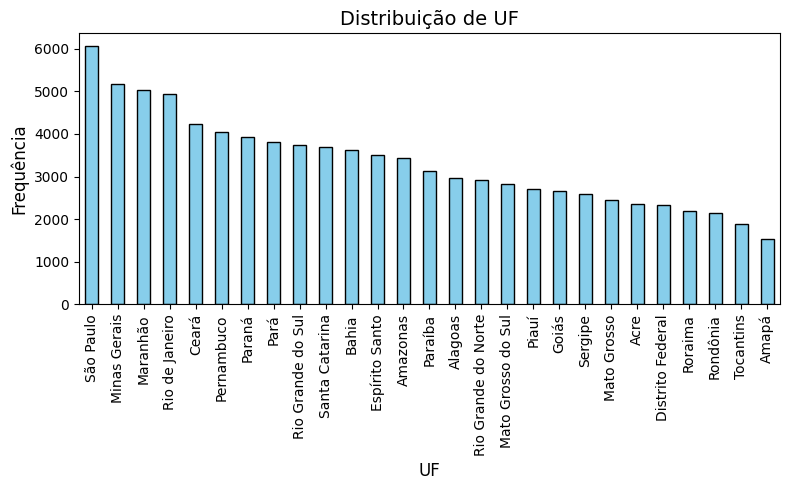

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

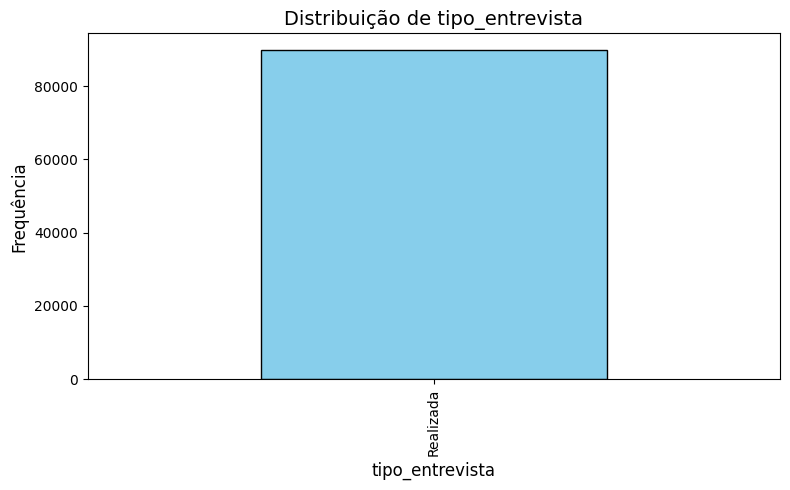

Quantidade_moradores: 89954 valores válidos de 89954 totais


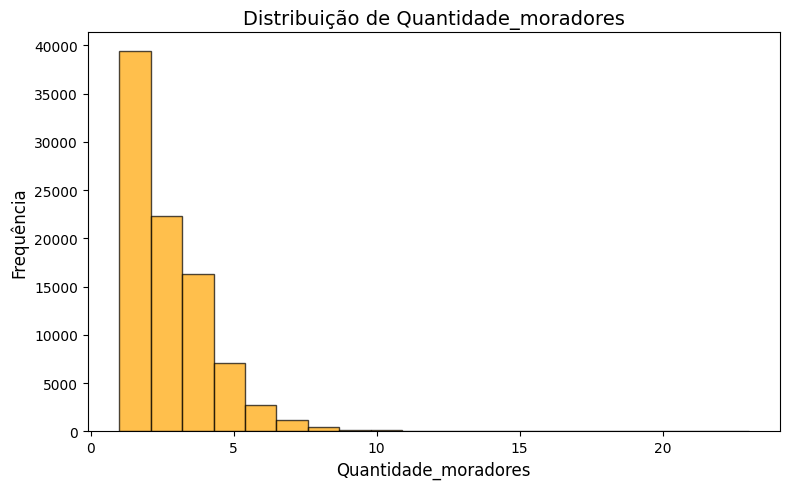

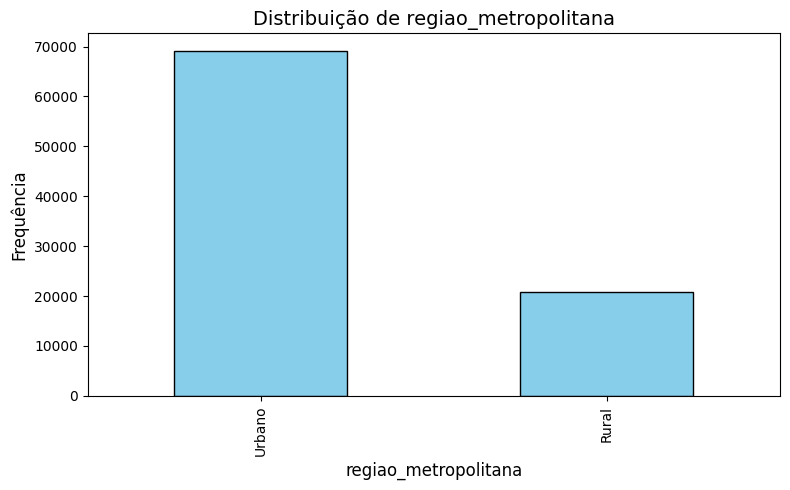

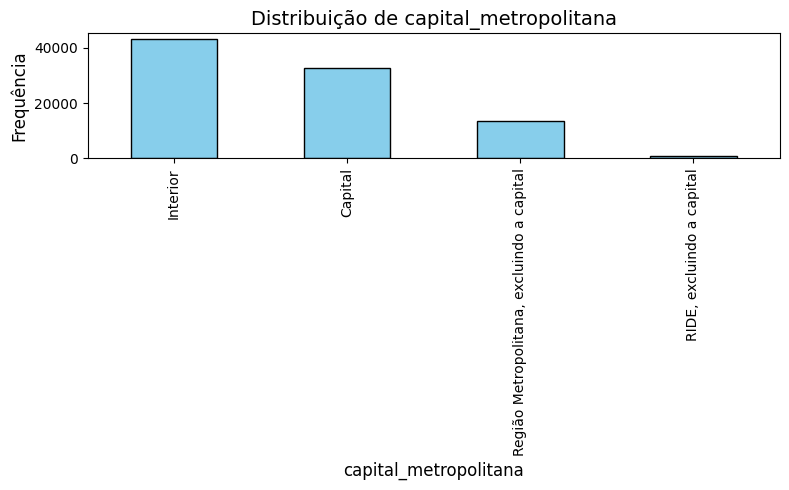

N_pessoas_domicilio: 89954 valores válidos de 89954 totais


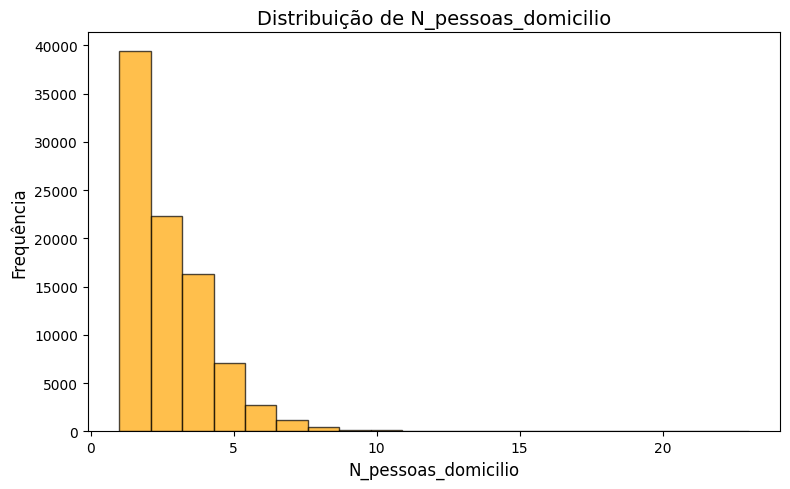

N_ordem_morador: 89954 valores válidos de 89954 totais


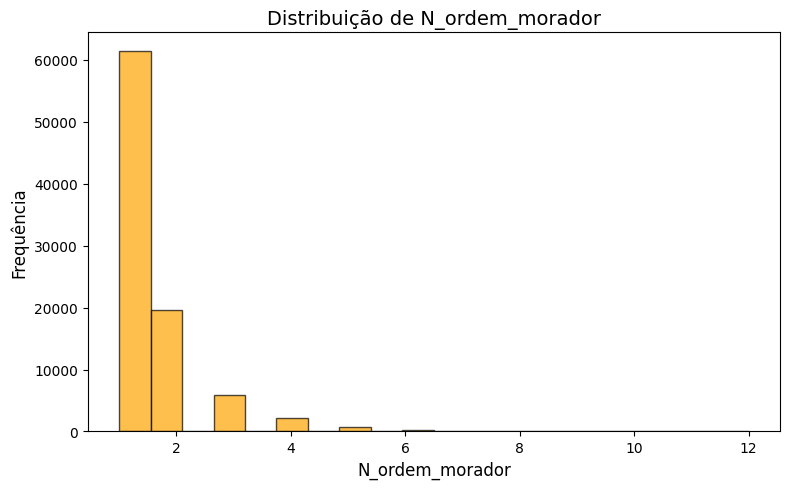

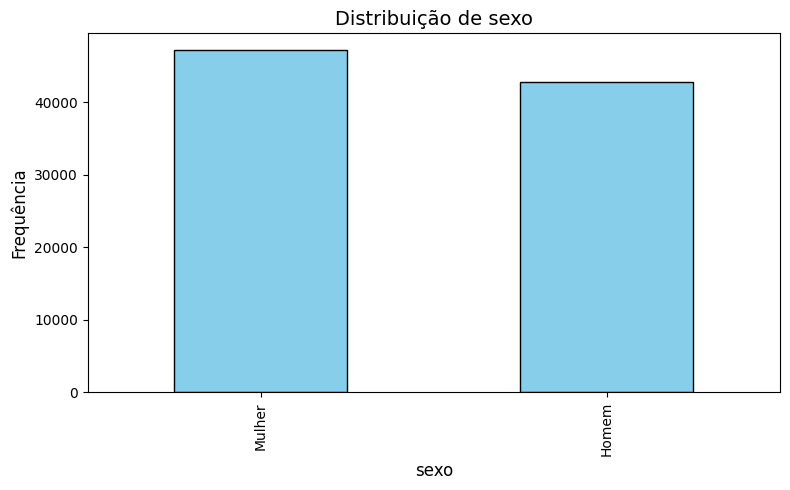

dia_nascimento: 89954 valores válidos de 89954 totais


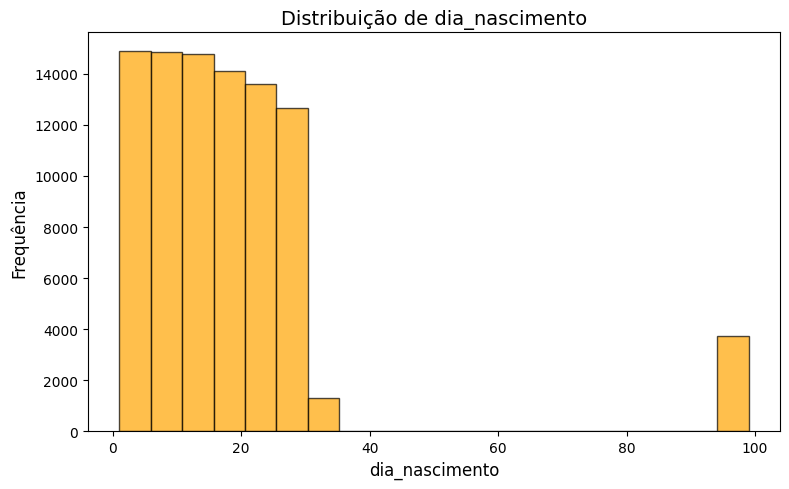

mes_nascimento: 89954 valores válidos de 89954 totais


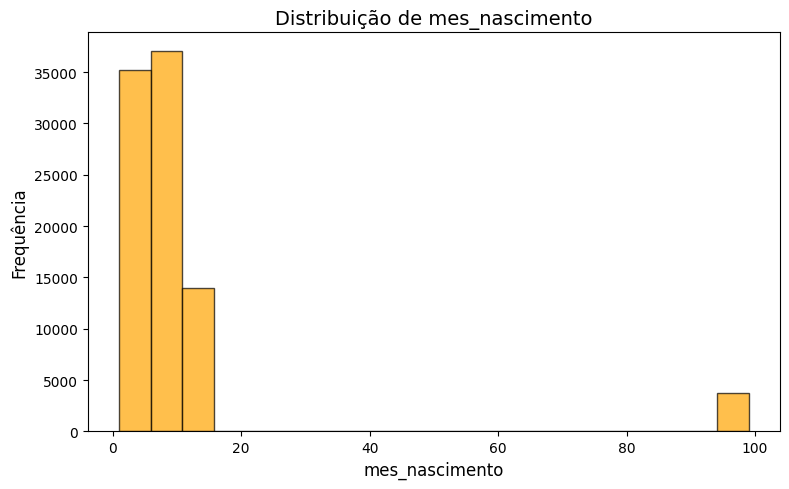

ano_nascimento: 89954 valores válidos de 89954 totais


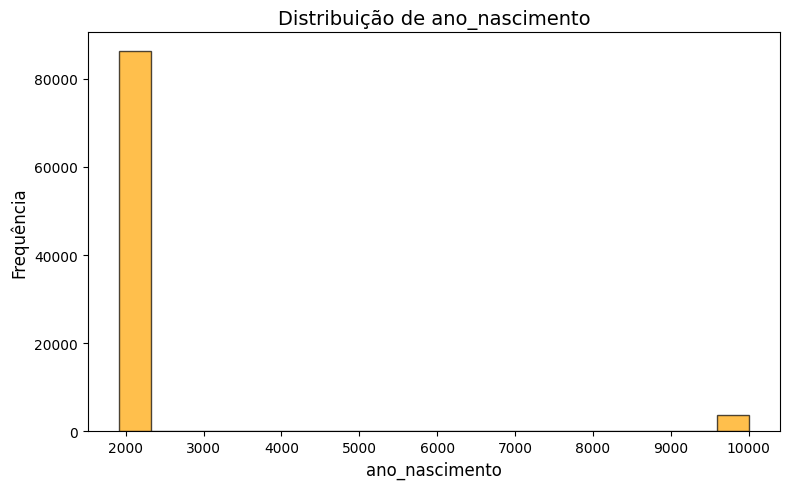

idade: 89954 valores válidos de 89954 totais


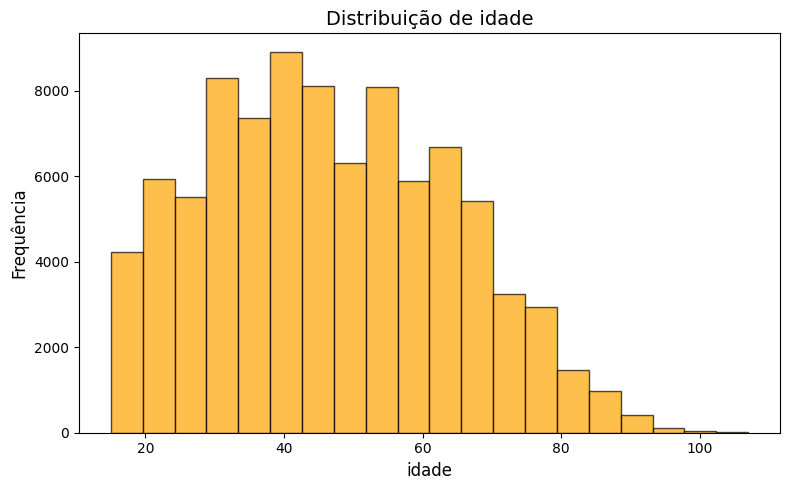

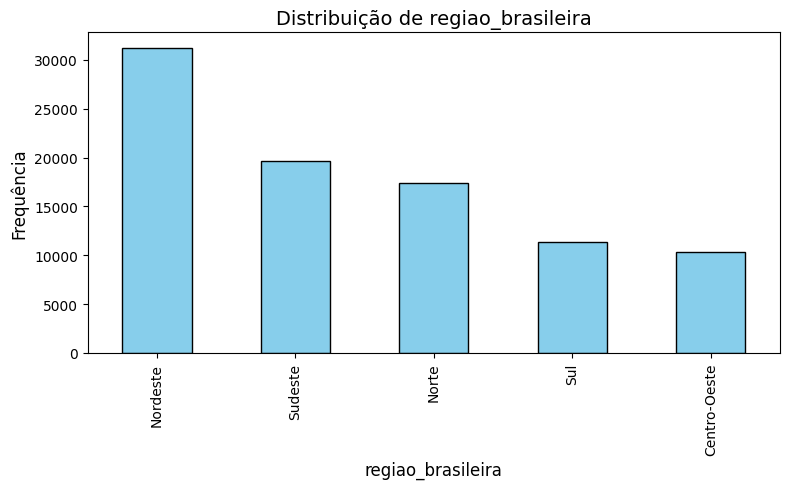

peso: 89954 valores válidos de 89954 totais


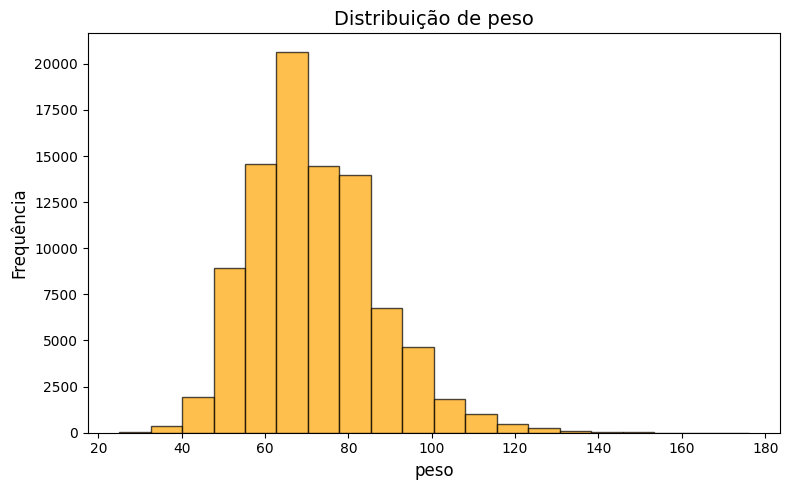

altura: 89954 valores válidos de 89954 totais


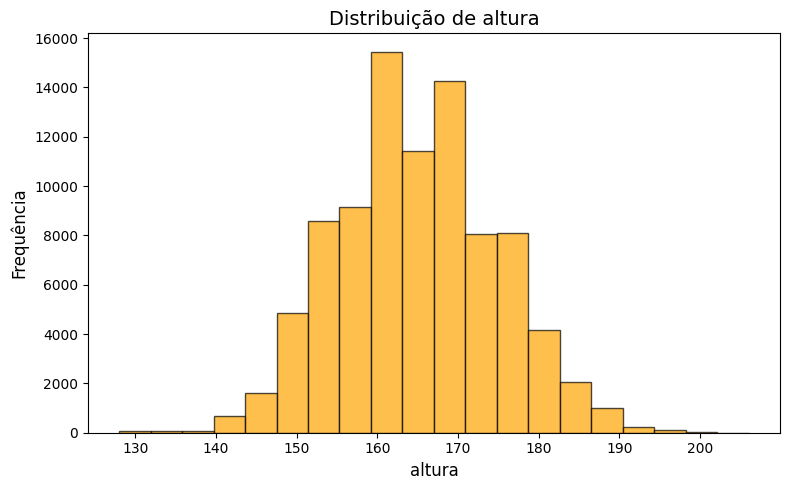

imc: 89954 valores válidos de 89954 totais


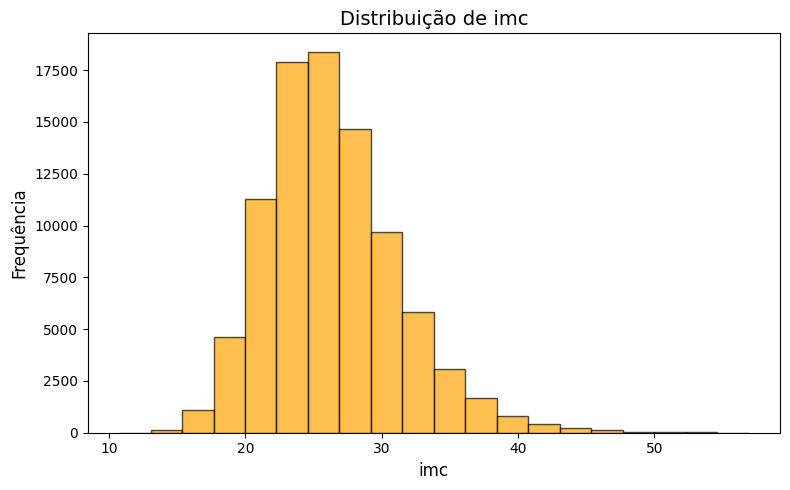

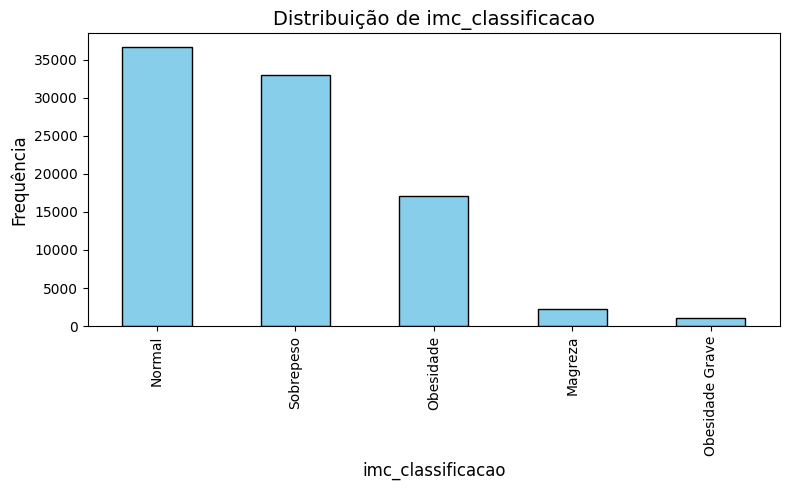

<Figure size 800x500 with 0 Axes>

In [ ]:
def plot_graphs_with_null_check(df, cols):
    df = df.copy()
    for col in cols:
        plt.figure(figsize=(8, 5))

        # Categorias (object)
        if df[col].dtype == "object":
            df[col].value_counts().plot(kind="bar", color="skyblue", edgecolor="black")
            plt.title(f"Distribuição de {col}", fontsize=14)
            plt.ylabel("Frequência", fontsize=12)
            plt.xlabel(col, fontsize=12)

        # Numéricos (float64), ignorando nulos
        elif pd.api.types.is_float_dtype(df[col]):
            valid_data = df[col].dropna()  # Remove valores nulos
            print(f"{col}: {len(valid_data)} valores válidos de {len(df[col])} totais")

            valid_data.plot(kind="hist", bins=20, color="orange", edgecolor="black", alpha=0.7)
            plt.title(f"Distribuição de {col}", fontsize=14)
            plt.ylabel("Frequência", fontsize=12)
            plt.xlabel(col, fontsize=12)

        plt.tight_layout()
        plt.show()

cols = ['UF', 'Estrato', 'UPA', 'N_ordem_domicilio_PNS',
       'Quantidade_moradores', 'regiao_metropolitana', 'capital_metropolitana',
       'N_pessoas_domicilio', 'N_ordem_morador', 'sexo', 'dia_nascimento',
       'mes_nascimento', 'ano_nascimento', 'idade', 'regiao_brasileira', 'peso', 'altura', 'imc',
       'imc_classificacao', 'imc_grau_obesidade']
# Chamando a função com verificação
plot_graphs_with_null_check(df_imc, cols)


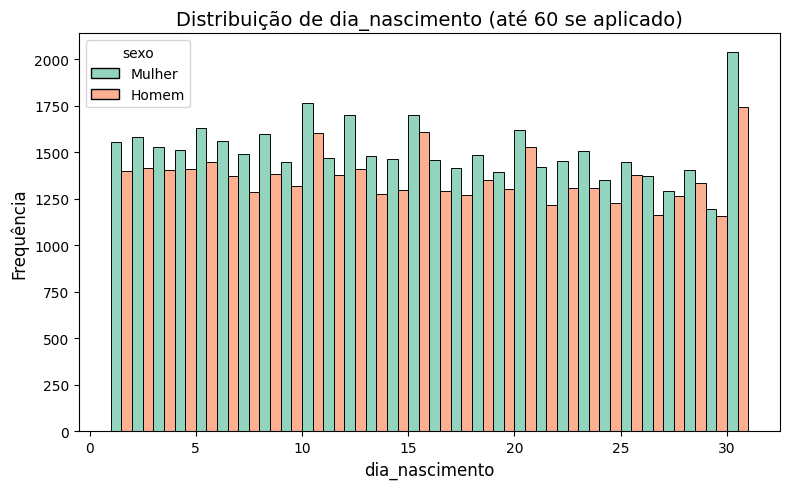

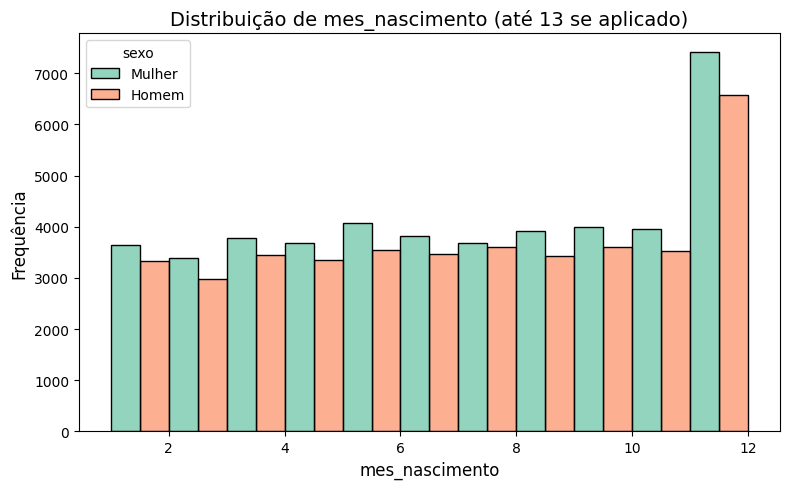

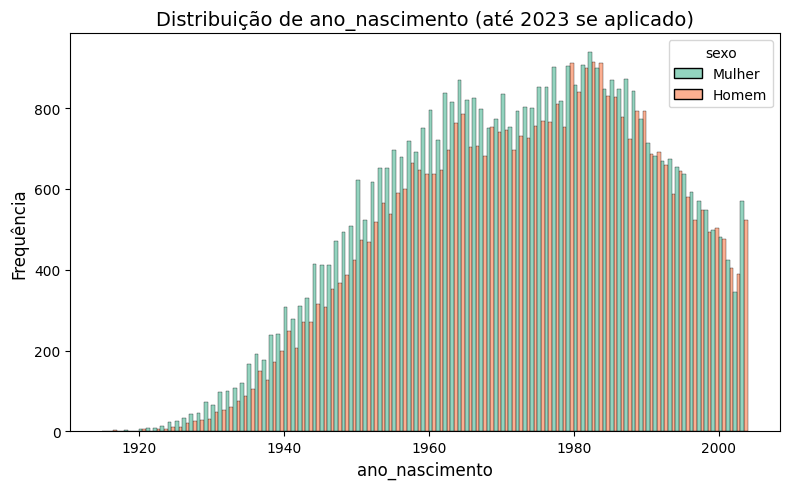

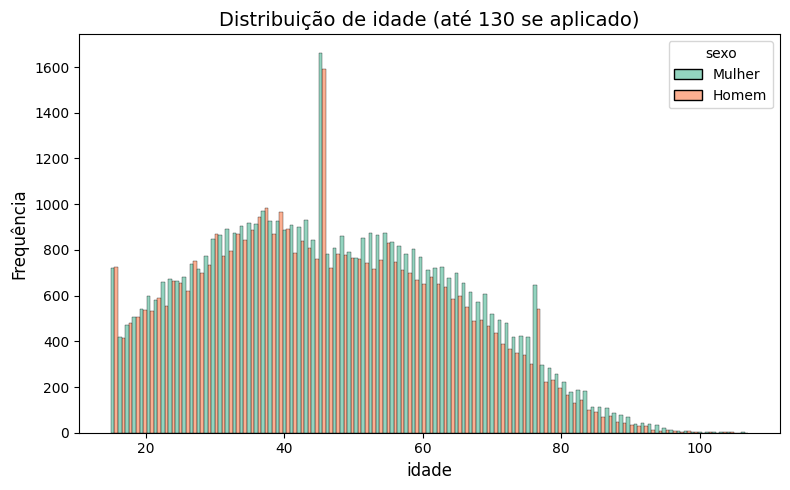

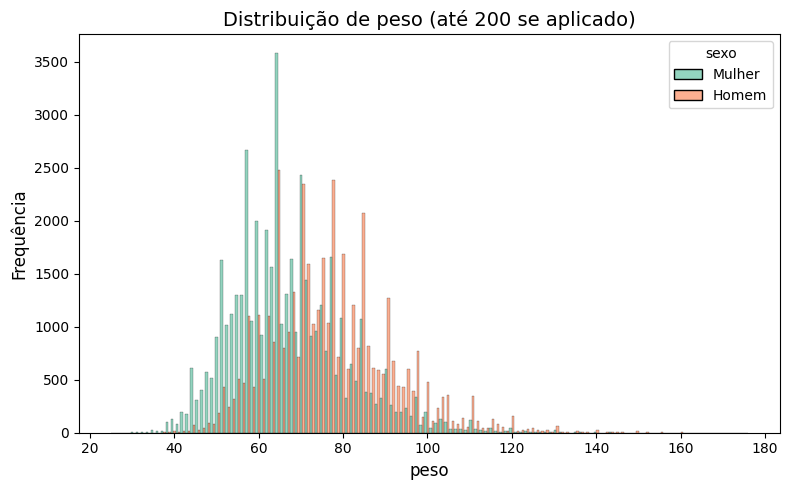

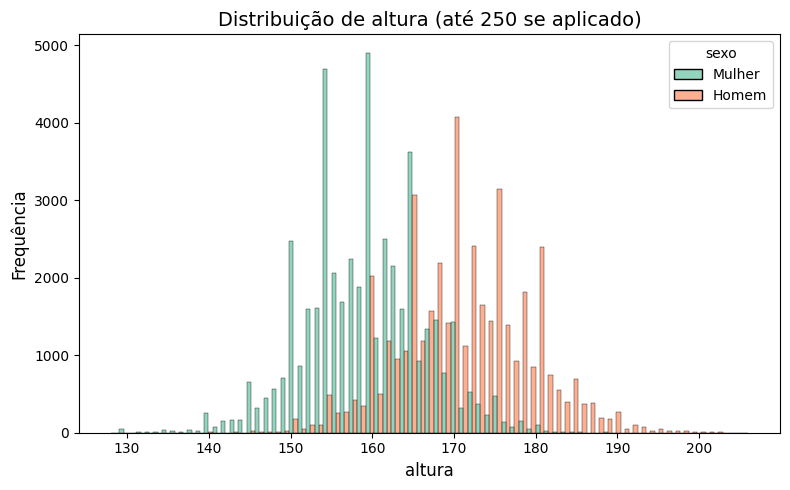

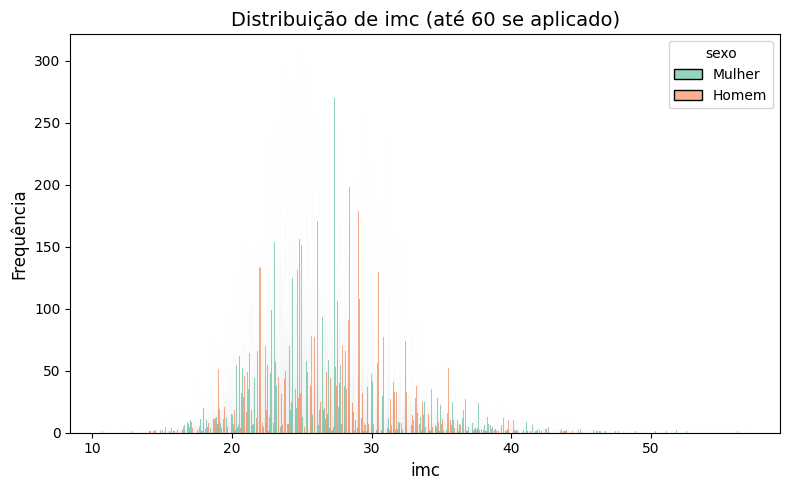

In [ ]:
def plot_filtered_columns_with_hue(df, columns_limits, hue=None):
    """
    Plota histogramas para as colunas numéricas selecionadas, filtrando valores abaixo de limites específicos,
    e separando os dados com base em uma variável categórica (hue).

    :param df: DataFrame do Pandas contendo os dados.
    :param columns_limits: Dicionário onde a chave é o nome da coluna e o valor é o limite para filtrar os dados.
    :param hue: Coluna categórica para dividir os dados (e.g., 'sexo').
    """
    import seaborn as sns
    df = df.copy()

    for col, limite in columns_limits.items():
        if col in df.columns and pd.api.types.is_float_dtype(df[col]):
            plt.figure(figsize=(8, 5))

            # Filtrar os dados abaixo do limite, se especificado
            filtered_df = df.dropna(subset=[col])
            if limite is not None:
                filtered_df = filtered_df[filtered_df[col] <= limite]

            # Plotar com ou sem hue
            if hue and hue in df.columns:
                sns.histplot(
                    data=filtered_df,
                    x=col,
                    hue=hue,
                    bins=(len(df[col].unique())-2),
                    palette="Set2",
                    kde=False,
                    edgecolor="black",
                    alpha=0.7,
                    multiple="dodge"
                )
            else:
                sns.histplot(
                    data=filtered_df,
                    x=col,
                    bins=len(df[col].unique()),
                    color="orange",
                    edgecolor="black",
                    alpha=0.7,
                    multiple="dodge"
                )

            # Títulos e etiquetas
            plt.title(f"Distribuição de {col} (até {limite} se aplicado)", fontsize=14)
            plt.ylabel("Frequência", fontsize=12)
            plt.xlabel(col, fontsize=12)
            plt.tight_layout()
            plt.show()

# Dicionário com colunas e seus respectivos limites
columns_limits = {
    "dia_nascimento": 60,
    "mes_nascimento": 13,
    "ano_nascimento": 2023,
    "idade": 130,
    "peso": 200,
    "altura": 250,
    "imc": 60
}

# Chamando a função com limites e hue='sexo'
plot_filtered_columns_with_hue(df_imc, columns_limits, hue="sexo")


In [50]:
df[df.idade < 18].shape

(71537, 31)

In [51]:
#
df[df.ano_nascimento>= 2013].shape

(38954, 31)

In [40]:
df.columns

Index(['UF', 'Estrato', 'UPA', 'N_ordem_domicilio_PNS', 'tipo_entrevista',
       'Quantidade_moradores', 'regiao_metropolitana', 'capital_metropolitana',
       'N_pessoas_domicilio', 'N_ordem_morador', 'sexo', 'dia_nascimento',
       'mes_nascimento', 'ano_nascimento', 'idade', 'peso_info_kg',
       'peso_final_kg', 'altura_info_cm', 'altura_final_cm',
       'antropometria_aferida_morador', 'peso_1_pesagem_kg',
       'peso_2_pesagem_kg', 'peso_final_medido_kg', 'altura_1_medicao_cm',
       'altura_2_medicao_cm', 'altura_final_medida_cm', 'chave_domicio',
       'chave_pessoa', 'regiao_brasileira', 'peso', 'altura'],
      dtype='object')

In [42]:
df[df.ano_nascimento>= 2013]

,UF,Estrato,UPA,N_ordem_domicilio_PNS,tipo_entrevista,Quantidade_moradores,regiao_metropolitana,capital_metropolitana,N_pessoas_domicilio,N_ordem_morador,...,peso_2_pesagem_kg,peso_final_medido_kg,altura_1_medicao_cm,altura_2_medicao_cm,altura_final_medida_cm,chave_domicio,chave_pessoa,regiao_brasileira,peso,altura
3,Rondônia,1110011,110000016,1,Realizada,6.0,Urbano,Capital,6.0,4.0,...,NaN,NaN,NaN,NaN,NaN,11_1110011_110000016_1,11_1110011_110000016_1_4.0,Norte,NaN,NaN
4,Rondônia,1110011,110000016,1,Realizada,6.0,Urbano,Capital,6.0,5.0,...,NaN,NaN,NaN,NaN,NaN,11_1110011_110000016_1,11_1110011_110000016_1_5.0,Norte,NaN,NaN
5,Rondônia,1110011,110000016,1,Realizada,6.0,Urbano,Capital,6.0,6.0,...,NaN,NaN,NaN,NaN,NaN,11_1110011_110000016_1,11_1110011_110000016_1_6.0,Norte,NaN,NaN
16,Rondônia,1110011,110000016,3,Realizada,8.0,Urbano,Capital,8.0,7.0,...,NaN,NaN,NaN,NaN,NaN,11_1110011_110000016_3,11_1110011_110000016_3_7.0,Norte,NaN,NaN
17,Rondônia,1110011,110000016,3,Realizada,8.0,Urbano,Capital,8.0,8.0,...,NaN,NaN,NaN,NaN,NaN,11_1110011_110000016_3,11_1110011_110000016_3_8.0,Norte,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279345,Distrito Federal,5310220,530041727,15,Realizada,3.0,Rural,Capital,3.0,3.0,...,NaN,NaN,NaN,NaN,NaN,53_5310220_530041727_15,53_5310220_530041727_15_3.0,Centro-Oeste,NaN,NaN
279358,Distrito Federal,5310220,530044434,6,Realizada,5.0,Rural,Capital,5.0,5.0,...,NaN,NaN,NaN,NaN,NaN,53_5310220_530044434_6,53_5310220_530044434_6_5.0,Centro-Oeste,NaN,NaN
279363,Distrito Federal,5310220,530044434,8,Realizada,6.0,Rural,Capital,6.0,5.0,...,NaN,NaN,NaN,NaN,NaN,53_5310220_530044434_8,53_5310220_530044434_8_5.0,Centro-Oeste,NaN,NaN
279364,Distrito Federal,5310220,530044434,8,Realizada,6.0,Rural,Capital,6.0,6.0,...,NaN,NaN,NaN,NaN,NaN,53_5310220_530044434_8,53_5310220_530044434_8_6.0,Centro-Oeste,NaN,NaN


In [41]:
df.ano_nascimento

,ano_nascimento
0,1963.0
1,1950.0
2,1987.0
3,9999.0
4,9999.0
...,...
279377,1986.0
279378,1970.0
279379,1935.0
279380,1997.0
